## Import Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 96.25  85.25  89.25]
   [ 95.5   84.5   88.5 ]
   [ 94.75  83.75  87.75]
   ...
   [121.   107.   106.  ]
   [114.   100.    99.  ]
   [120.   106.   105.  ]]

  [[101.    90.    94.  ]
   [ 93.25  82.25  86.25]
   [103.    92.    96.  ]
   ...
   [112.25  98.25  97.25]
   [114.   100.    99.  ]
   [111.25  97.25  96.25]]

  [[ 97.    86.    90.  ]
   [ 95.75  84.75  88.75]
   [ 96.75  85.75  89.75]
   ...
   [113.75  99.75  98.75]
   [113.75  99.75  98.75]
   [124.75 110.75 109.75]]

  ...

  [[125.75 123.75 134.75]
   [115.75 113.75 124.75]
   [117.75 115.75 126.75]
   ...
   [115.75 112.75 123.75]
   [116.25 113.25 124.25]
   [134.5  131.5  142.5 ]]

  [[123.   121.   132.  ]
   [119.5  117.5  128.5 ]
   [121.5  119.5  130.5 ]
   ...
   [122.   119.   130.  ]
   [120.5  117.5  128.5 ]
   [116.25 113.25 124.25]]

  [[122.   120.   131.  ]
   [121.5  119.5  130.5 ]
   [122.5  120.5  131.5 ]
   ...
   [124.75 120.75 134.75]
   [126.75 122.75 136.75]
   [120.25 116.25 13

## To Avoid Overshooting
1.choose small learning rate default 0.0001

2.There may be chance of underfitting,so increase No.of Neurons

3.Add more Convolution layer to extract more feature from images

## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))   #To avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#OUTPUT LAYER
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 271s 118ms/step - loss: 1.3827 - accuracy: 0.5913 - val_loss: 0.5920 - val_accuracy: 0.8108
Epoch 2/10
2197/2197 [==============================] - 257s 117ms/step - loss: 0.4644 - accuracy: 0.8527 - val_loss: 0.2606 - val_accuracy: 0.9136
Epoch 3/10
2197/2197 [==============================] - 249s 113ms/step - loss: 0.2677 - accuracy: 0.9132 - val_loss: 0.2644 - val_accuracy: 0.9142
Epoch 4/10
2197/2197 [==============================] - 248s 113ms/step - loss: 0.1839 - accuracy: 0.9405 - val_loss: 0.1980 - val_accuracy: 0.9397
Epoch 5/10
2197/2197 [==============================] - 246s 112ms/step - loss: 0.1365 - accuracy: 0.9551 - val_loss: 0.1300 - val_accuracy: 0.9597
Epoch 6/10
2197/2197 [==============================] - 244s 111ms/step - loss: 0.1097 - accuracy: 0.9641 - val_loss: 0.1327 - val_accuracy: 0.9589
Epoch 7/10
2197/2197 [==============================] - 249s 113ms/step - loss: 0.0872 - accuracy: 0.9711 - val_

## Model Evaluation

In [22]:
#model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 123s 56ms/step - loss: 0.0172 - accuracy: 0.9946


In [23]:
print(train_loss,train_acc)

0.017204686999320984 0.9945657849311829


In [24]:
#model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 31s 55ms/step - loss: 0.0984 - accuracy: 0.9712


In [25]:
print(val_loss,val_acc)

0.09844696521759033 0.9712041616439819


## Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [1.382669448852539,
  0.4644339382648468,
  0.2676984667778015,
  0.18394187092781067,
  0.13652917742729187,
  0.10966066271066666,
  0.08724652230739594,
  0.07501626014709473,
  0.06144392490386963,
  0.057376597076654434],
 'accuracy': [0.5912511348724365,
  0.8527491092681885,
  0.9132086038589478,
  0.9405363202095032,
  0.9550750255584717,
  0.964108407497406,
  0.9711074829101562,
  0.9756454825401306,
  0.9794437885284424,
  0.9814069271087646],
 'val_loss': [0.591988742351532,
  0.2606216371059418,
  0.26438167691230774,
  0.19797462224960327,
  0.1299864947795868,
  0.13265734910964966,
  0.16705556213855743,
  0.16869567334651947,
  0.10206989198923111,
  0.09844692796468735],
 'val_accuracy': [0.8108354210853577,
  0.9135556817054749,
  0.9142385721206665,
  0.9396767616271973,
  0.9596517086029053,
  0.9589118957519531,
  0.9479854106903076,
  0.9502048492431641,
  0.9709765315055847,
  0.9712041616439819]}

In [28]:
#Recording History in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [29]:
training_history.history['accuracy']

[0.5912511348724365,
 0.8527491092681885,
 0.9132086038589478,
 0.9405363202095032,
 0.9550750255584717,
 0.964108407497406,
 0.9711074829101562,
 0.9756454825401306,
 0.9794437885284424,
 0.9814069271087646]

In [30]:
training_history.history['val_accuracy']

[0.8108354210853577,
 0.9135556817054749,
 0.9142385721206665,
 0.9396767616271973,
 0.9596517086029053,
 0.9589118957519531,
 0.9479854106903076,
 0.9502048492431641,
 0.9709765315055847,
 0.9712041616439819]

## Accuracy Visualization

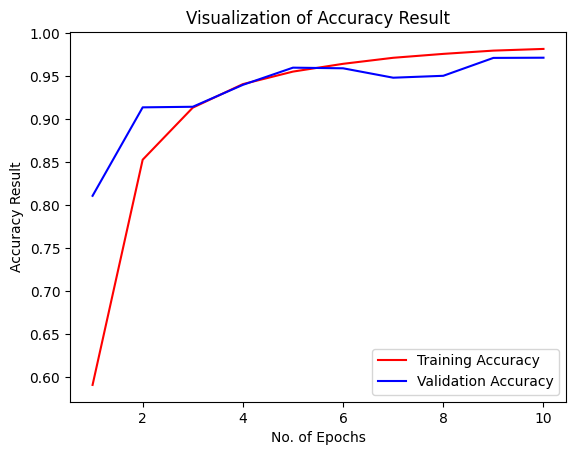

In [33]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


## Some Other Metrics for Model Evaluation

In [35]:
class_names = validation_set.class_names  # Only if it exists
print(class_names)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [36]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 27s 48ms/step


(array([[9.9999785e-01, 1.7494875e-06, 1.5384546e-11, ..., 9.7319533e-16,
         1.9484019e-14, 4.0539137e-15],
        [9.9999905e-01, 8.5062993e-08, 2.3157005e-13, ..., 6.0165163e-16,
         1.3598066e-13, 5.6910700e-15],
        [1.0000000e+00, 2.2985870e-11, 7.8489332e-14, ..., 8.0574940e-20,
         1.2680679e-17, 1.2543610e-17],
        ...,
        [1.5237742e-11, 5.5109444e-14, 6.7694050e-10, ..., 3.5810471e-12,
         2.9187781e-11, 9.9999988e-01],
        [4.4167933e-10, 7.2335714e-13, 1.9299748e-09, ..., 2.9201463e-10,
         3.5608591e-10, 9.9999881e-01],
        [1.4098305e-19, 1.7671553e-21, 4.2569780e-21, ..., 3.5010803e-21,
         5.1668724e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [46]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

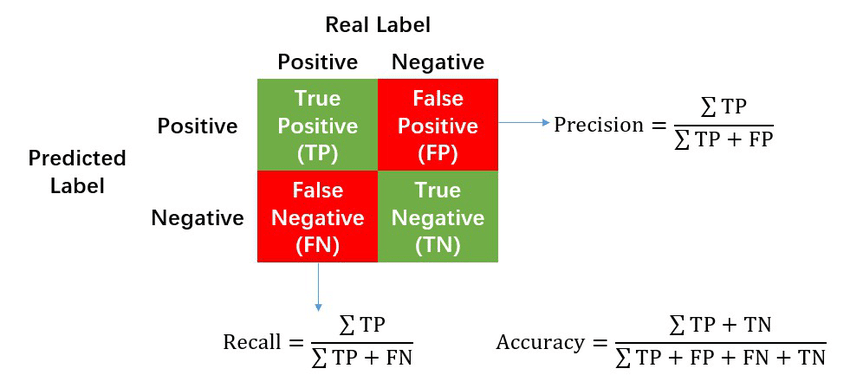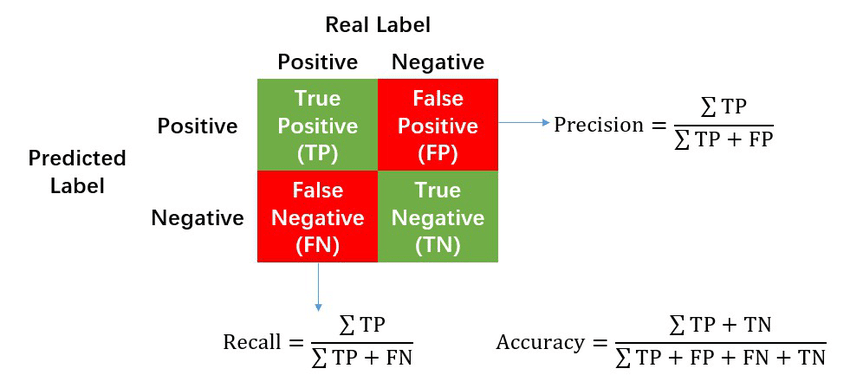

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       0.99      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [50]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[487,   7,   0, ...,   0,   1,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 444,   1],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

## Confusion Matrix Visualization

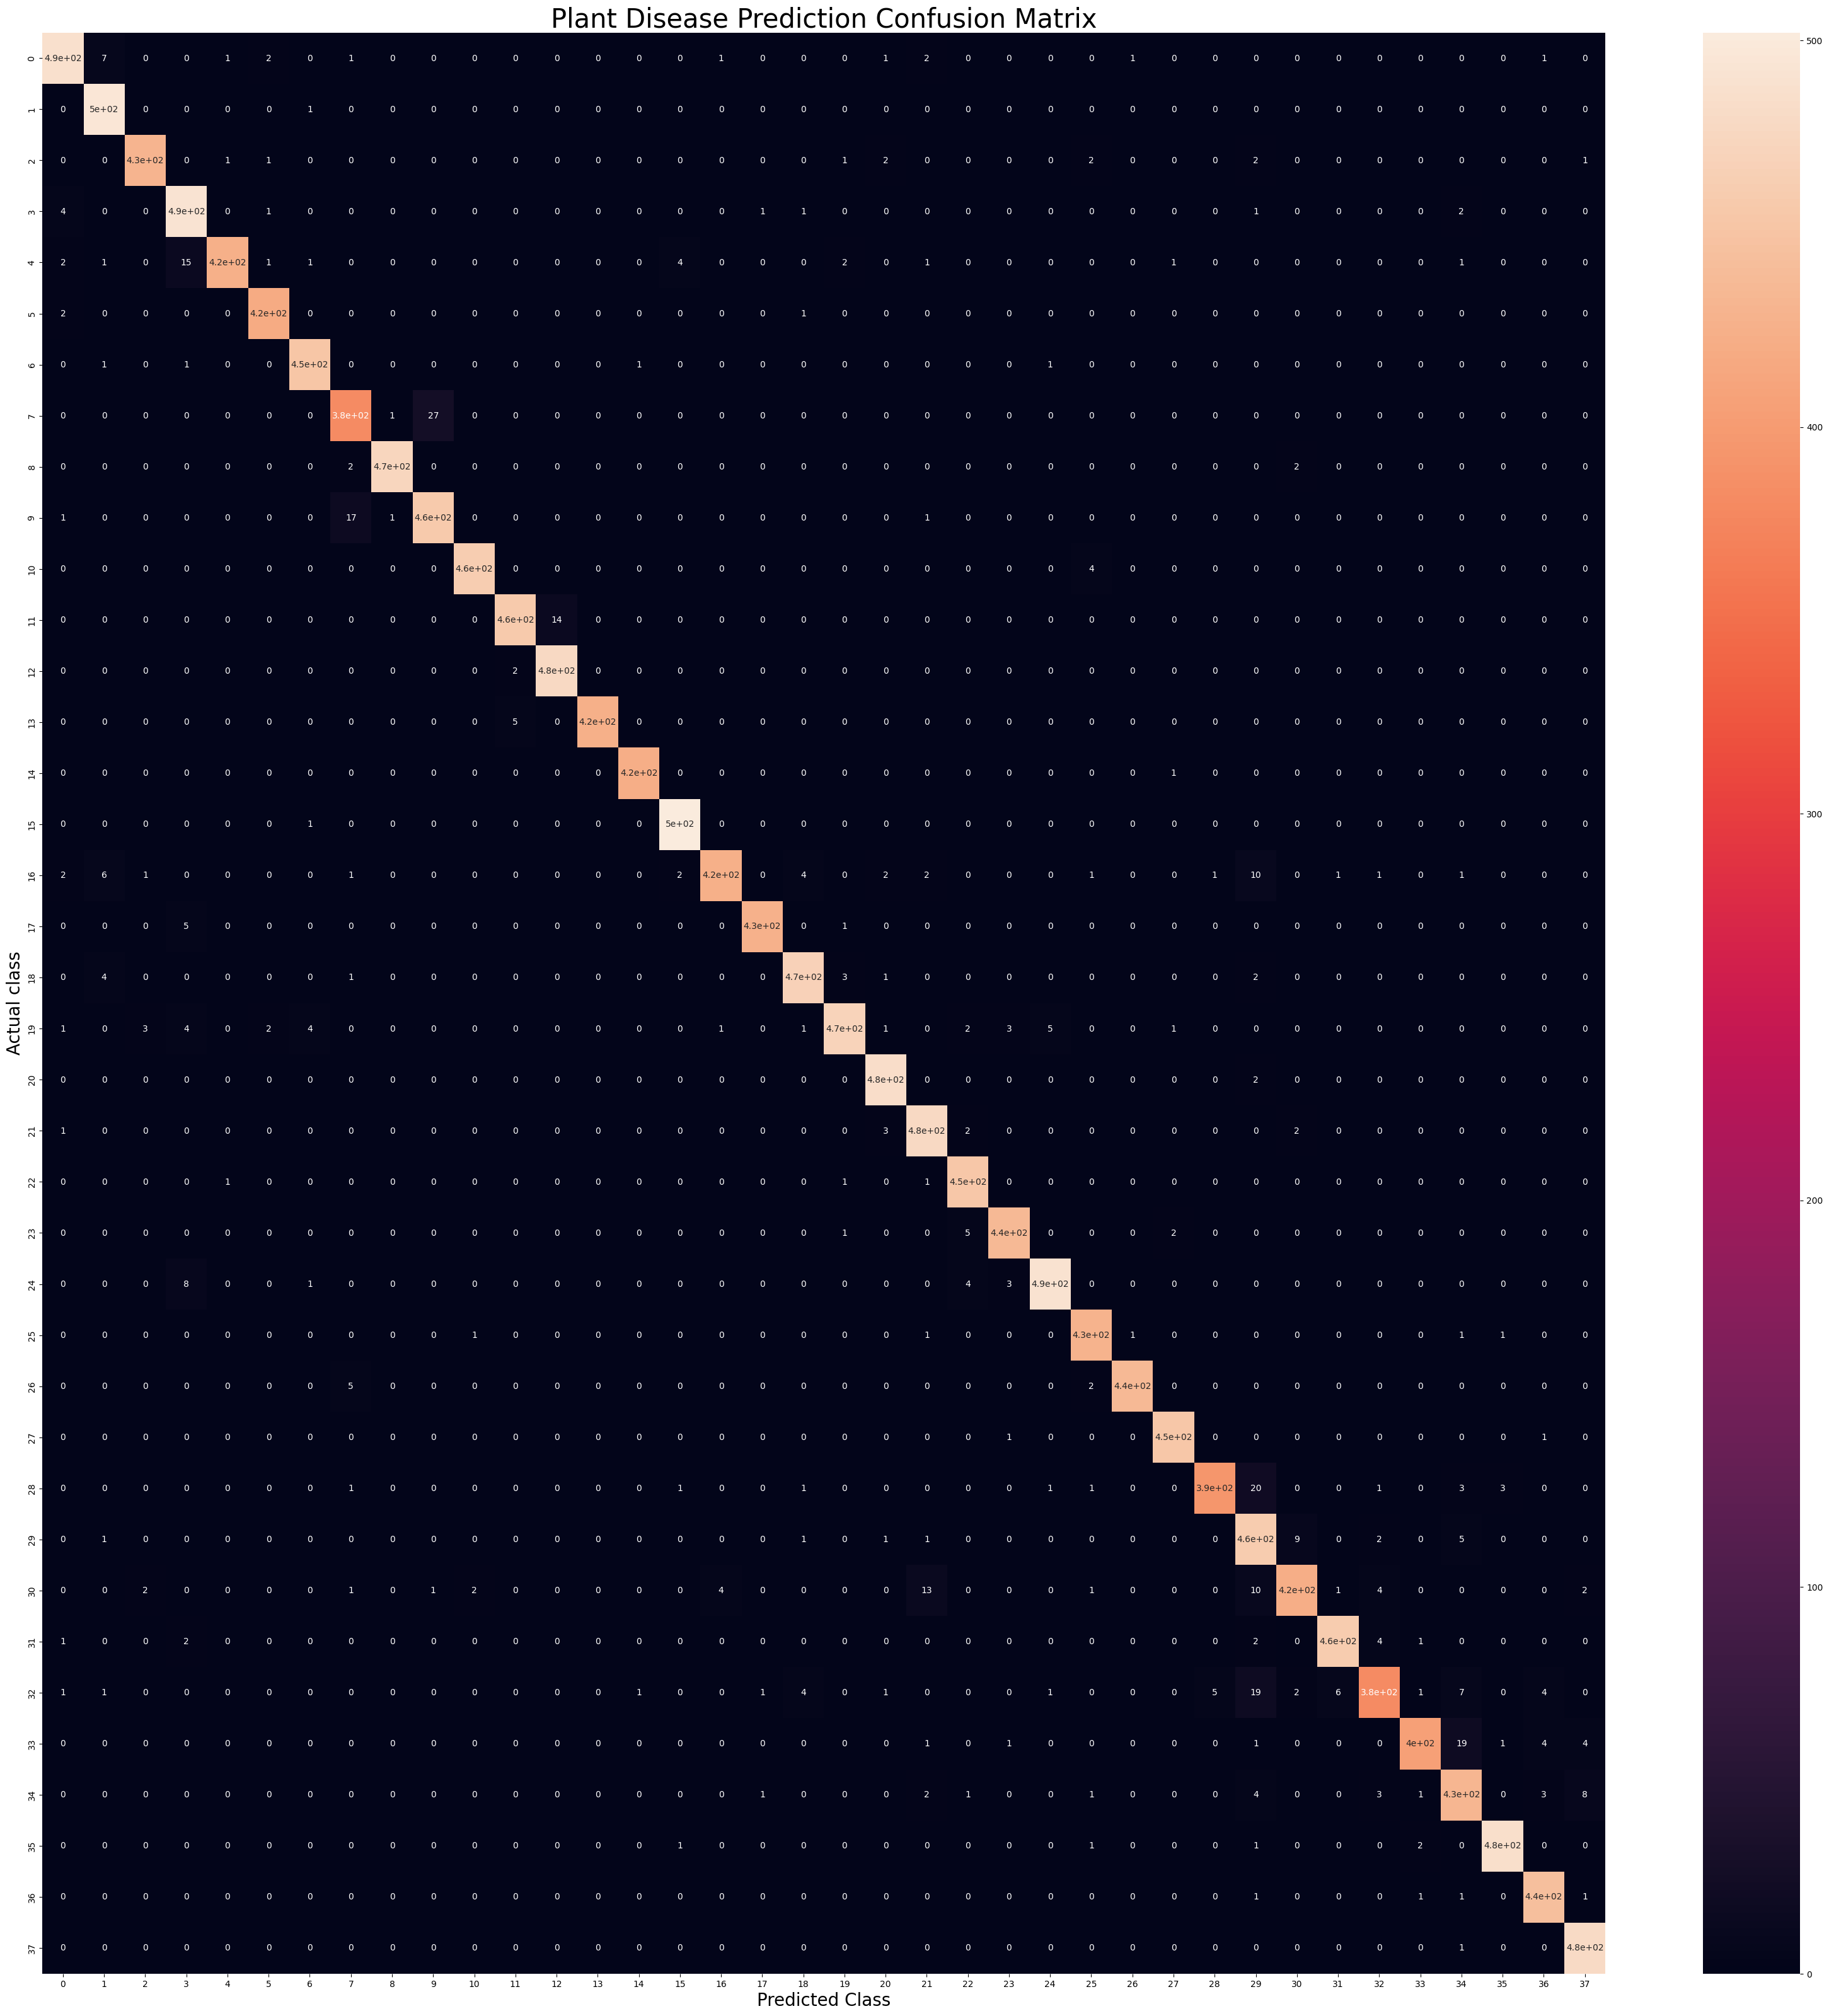

In [51]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()